In [6]:
#!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.5 MB/s eta 0:00:00
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Users\cindy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [7]:
#Importing necessary libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from lightgbm import LGBMRegressor 

In [ ]:
#Step 1:

In [9]:
test = pd.read_csv('bike_sharing_test.csv')
df_raw = pd.read_csv('bike_sharing_train.csv')



In [ ]:
#Step 2:

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
df_raw.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8701,2012-08-04 22:00:00,3,0,0,1,31.16,36.365,66,19.0012,104,165,269
952,2011-03-04 03:00:00,1,0,1,2,7.38,8.335,74,16.9979,0,1,1
8719,2012-08-05 16:00:00,3,0,0,1,33.62,37.880,46,16.9979,143,278,421
7777,2012-06-04 10:00:00,2,0,1,1,26.24,31.060,41,31.0009,67,120,187
4535,2011-11-02 01:00:00,4,0,1,1,12.30,16.665,87,0.0000,2,8,10
2404,2011-06-08 02:00:00,2,0,1,1,26.24,28.790,89,6.0032,0,7,7
9847,2012-10-14 16:00:00,4,0,0,1,26.24,31.060,41,19.9995,203,378,581
9351,2012-09-13 00:00:00,3,0,1,1,22.96,26.515,73,6.0032,11,46,57
1755,2011-04-19 01:00:00,2,0,1,1,18.86,22.725,63,15.0013,5,2,7
10764,2012-12-14 22:00:00,4,0,1,1,11.48,14.395,75,7.0015,4,134,138


In [12]:
df_interim=df_raw.copy()

In [13]:
df_interim['datetime']=pd.to_datetime(df_interim['datetime'])
df_interim=df_interim.set_index(df_interim['datetime'])
df_interim['hour']=df_interim.index.hour
df_interim['day']=df_interim.index.day
df_interim['month']=df_interim.index.month
df_interim=df_interim.drop(['datetime','casual','registered'],axis=1)

In [14]:
df_interim.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2012-04-08 09:00:00,2,0,0,1,18.04,21.970,26,15.0013,179,9,8,4
2011-08-11 23:00:00,3,0,1,1,27.06,31.060,50,11.0014,127,23,11,8
2011-08-12 04:00:00,3,0,1,1,25.42,31.060,53,8.9981,5,4,12,8
2011-04-12 07:00:00,2,0,1,2,22.14,25.760,68,15.0013,189,7,12,4
2012-12-03 18:00:00,4,0,1,1,20.50,24.240,68,6.0032,692,18,3,12
2011-05-08 01:00:00,2,0,0,2,21.32,25.000,55,0.0000,64,1,8,5
2011-05-06 03:00:00,2,0,1,1,14.76,18.180,71,7.0015,9,3,6,5
2011-09-07 16:00:00,3,0,1,1,26.24,28.790,89,0.0000,144,16,7,9
2011-06-11 02:00:00,2,0,0,1,28.70,33.335,79,7.0015,60,2,11,6


In [15]:
df=df_interim.copy()

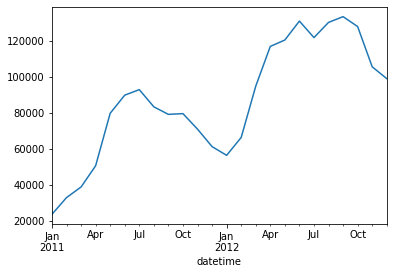

In [16]:
df['count'].resample('M').sum().plot()
plt.show()

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
hour,10886.0,11.541613,6.915838,0.00,6.0000,12.000,18.0000,23.0000


In [19]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2,1,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3,1,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19,19,12
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20,19,12
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21,19,12


In [20]:
res=seasonal_decompose(df['count'].values, period=24)
res_observed=res.observed
res_trend=res.trend
res_seasonal=res.seasonal
res_residual=res.resid

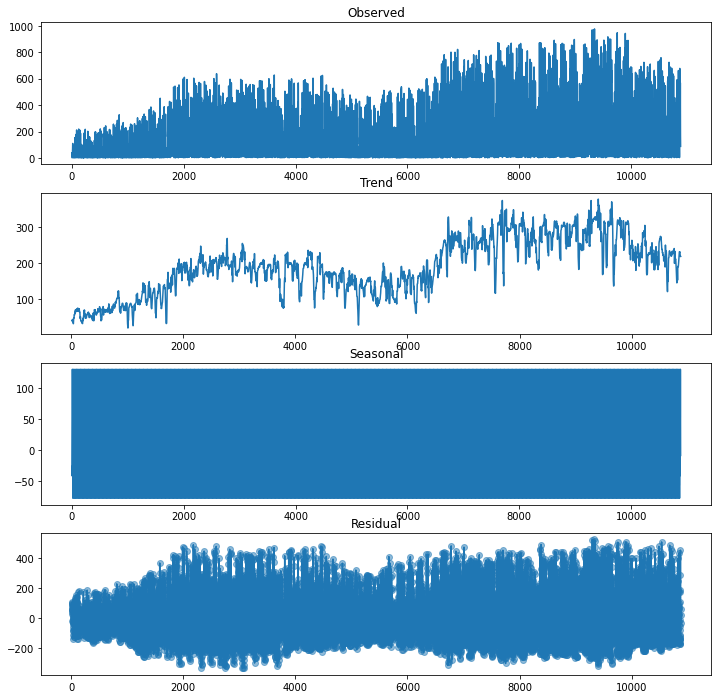

In [22]:
fig,ax=plt.subplots(4, figsize=(12,12))
ax[0].set_title('Observed')
ax[0].plot(res_observed)
ax[1].set_title('Trend')
ax[1].plot(res_trend)
ax[2].set_title('Seasonal')
ax[2].plot(res_seasonal)
ax[3].set_title('Residual')
ax[3].plot(res_residual)
ax[3].scatter(y=res_residual, x=range(len(res_residual)), alpha=0.5)
plt.show()


In [23]:
res=seasonal_decompose(df['count'].values[-250:], period=24)
res_observed=res.observed
res_trend=res.trend
res_seasonal=res.seasonal
res_residual=res.resid

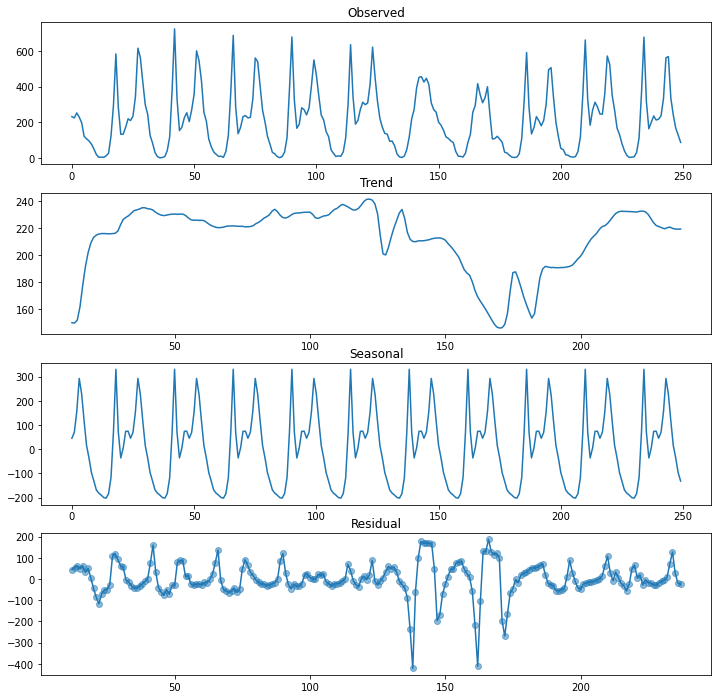

In [24]:
fig,ax=plt.subplots(4, figsize=(12,12))
ax[0].set_title('Observed')
ax[0].plot(res_observed)
ax[1].set_title('Trend')
ax[1].plot(res_trend)
ax[2].set_title('Seasonal')
ax[2].plot(res_seasonal)
ax[3].set_title('Residual')
ax[3].plot(res_residual)
ax[3].scatter(y=res_residual, x=range(len(res_residual)), alpha=0.5)
plt.show()


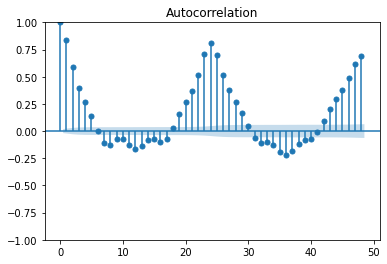

In [25]:
plot_acf(df['count'].values, lags=48)
plt.show()

In [27]:
X=df.drop('count',axis=1)
y=df['count']

horizon=168

X_train, X_test=X.iloc[:-horizon,:],X.iloc[-horizon:,:]

y_train, y_test=y.iloc[:-horizon],y.iloc[-horizon:]



In [29]:
model=LGBMRegressor(random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [30]:
mae=np.round(mean_absolute_error(y_test, y_pred),1)
rmse=np.round(np.sqrt(mean_squared_error(y_test, y_pred)),1)
print(f'MAE:{mae}, RMSE:{rmse}')


MAE:53.8, RMSE:73.8


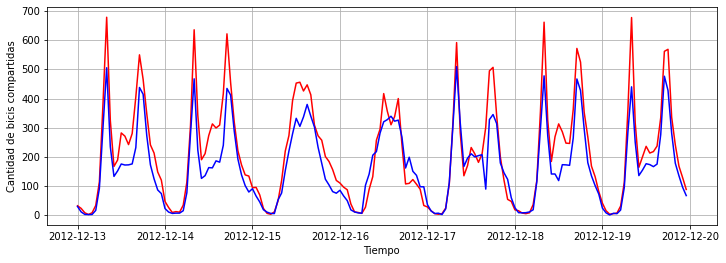

In [31]:
fig=plt.figure(figsize=(12,4))
plt.plot(y_test, color='Red')
plt.plot(pd.Series(y_pred, index=y_test.index), color='Blue')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de bicis compartidas')
plt.grid()
plt.show()

In [32]:
df_var_imp=pd.DataFrame({'var':model.feature_name_, 'imp':model.feature_importances_}).sort_values(by='imp',ascending=False)
df_var_imp

,var,imp
8,hour,752
9,day,401
6,humidity,392
4,temp,323
2,workingday,253
10,month,226
5,atemp,222
7,windspeed,190
0,season,102
3,weather,87


In [33]:
df['count_lag_week']=df['count'].shift(24*7)
df=df.dropna(how='any', axis=0)

MAE:32.7, RMSE:48.4


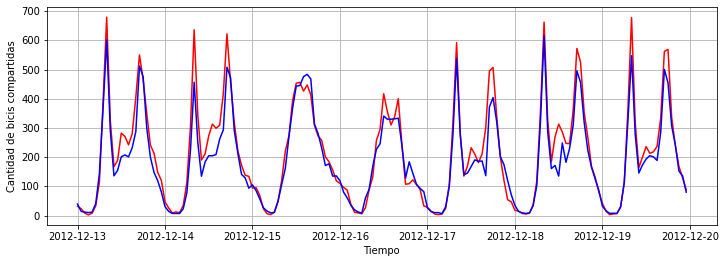

In [34]:
X=df.drop('count',axis=1)
y=df['count']

horizon=168

X_train, X_test=X.iloc[:-horizon,:],X.iloc[-horizon:,:]

y_train, y_test=y.iloc[:-horizon],y.iloc[-horizon:]

model=LGBMRegressor(random_state=123)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

mae=np.round(mean_absolute_error(y_test, y_pred),1)
rmse=np.round(np.sqrt(mean_squared_error(y_test, y_pred)),1)
print(f'MAE:{mae}, RMSE:{rmse}')
fig=plt.figure(figsize=(12,4))
plt.plot(y_test, color='Red')
plt.plot(pd.Series(y_pred, index=y_test.index), color='Blue')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de bicis compartidas')
plt.grid()
plt.show()